<a href="https://colab.research.google.com/github/Morioh/Grant-Recipient-Classifier/blob/main/Model_Training_and_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Alusive Grant Recipient Classifier**

In [123]:
pip install tensorflow

In [124]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score


In [125]:
# Load data from CSV
data = pd.read_csv('/content/Applicant Data - T, T & V.csv')

# View the first few rows of the dataset
data.head()

,Academic Standing,Disciplinary Standing,Fnancial Standing,Fee balance (USD),ALU Grant Status,Previous Alusive Grant Status,Total Monthly Income,Students in Household,Household Size,Household Supporters,Household Dependants,ALU Grant Amount,Grant Requested,Amount Affordable,Grant Classifier
0,1,1,0,500.0,0,0,1000,5,10,1,8,0,1500,500,1
1,0,0,0,1280.0,1,0,1000,1,4,2,2,1500,1000,500,0
2,1,1,0,1500.0,0,0,1250,3,8,1,4,0,1000,1000,1
3,1,1,0,1500.0,0,0,1500,3,10,1,8,0,1500,1000,1
4,1,1,0,500.0,1,0,1000,2,2,1,2,2000,1000,500,1


In [126]:
#  Summary statistics of the dataset
data.describe()

,Academic Standing,Disciplinary Standing,Fnancial Standing,Fee balance (USD),ALU Grant Status,Previous Alusive Grant Status,Total Monthly Income,Students in Household,Household Size,Household Supporters,Household Dependants,ALU Grant Amount,Grant Requested,Amount Affordable,Grant Classifier
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,0.981651,0.995413,0.279817,1045.418578,0.862385,0.091743,1221.330275,2.834862,7.385321,1.371560,5.853211,1337.155963,1089.449541,683.486239,0.637615
std,0.134517,0.067729,0.449942,805.010744,0.345288,0.289327,509.170801,1.562898,2.015645,0.571616,2.331217,625.749456,275.795740,315.940192,0.481796
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,1.000000,2.000000,1.000000,2.000000,0.000000,500.000000,500.000000,0.000000
25%,1.000000,1.000000,0.000000,500.000000,1.000000,0.000000,1000.000000,1.000000,6.000000,1.000000,4.000000,1000.000000,1000.000000,500.000000,0.000000
50%,1.000000,1.000000,0.000000,1000.000000,1.000000,0.000000,1000.000000,3.000000,8.000000,1.000000,6.000000,1500.000000,1000.000000,500.000000,1.000000
75%,1.000000,1.000000,1.000000,1500.000000,1.000000,0.000000,1250.000000,5.000000,8.000000,2.000000,8.000000,2000.000000,1500.000000,1000.000000,1.000000
max,1.000000,1.000000,1.000000,3000.000000,1.000000,1.000000,5000.000000,5.000000,10.000000,4.000000,10.000000,2000.000000,1500.000000,2000.000000,1.000000


In [127]:
# Check for missing values in the dataset
data.isnull().sum()

Academic Standing                0
Disciplinary Standing            0
Fnancial Standing                0
Fee balance (USD)                0
ALU Grant Status                 0
Previous Alusive Grant Status    0
Total Monthly Income             0
Students in Household            0
Household Size                   0
Household Supporters             0
Household Dependants             0
ALU Grant Amount                 0
Grant Requested                  0
Amount Affordable                0
Grant Classifier                 0
dtype: int64

In [128]:
# Count grant classes
data['Grant Classifier'].value_counts()

Grant Classifier
1    139
0     79
Name: count, dtype: int64

##Plotted distribution of grant classes

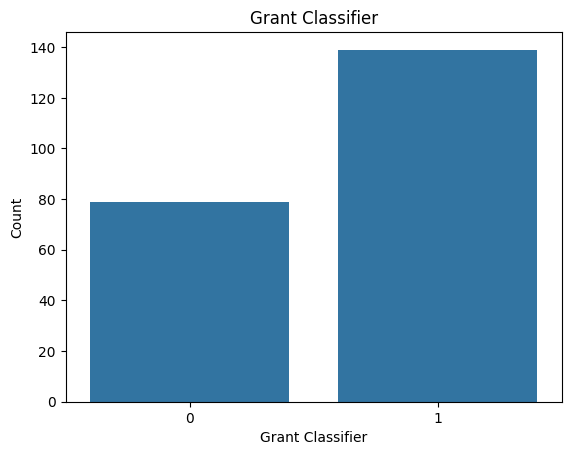

In [129]:
# Visualize the grant classes
sns.countplot(x='Grant Classifier', data=data)
plt.title('Grant Classifier')
plt.xlabel('Grant Classifier')
plt.ylabel('Count')
plt.show()

##General overview of data distribution

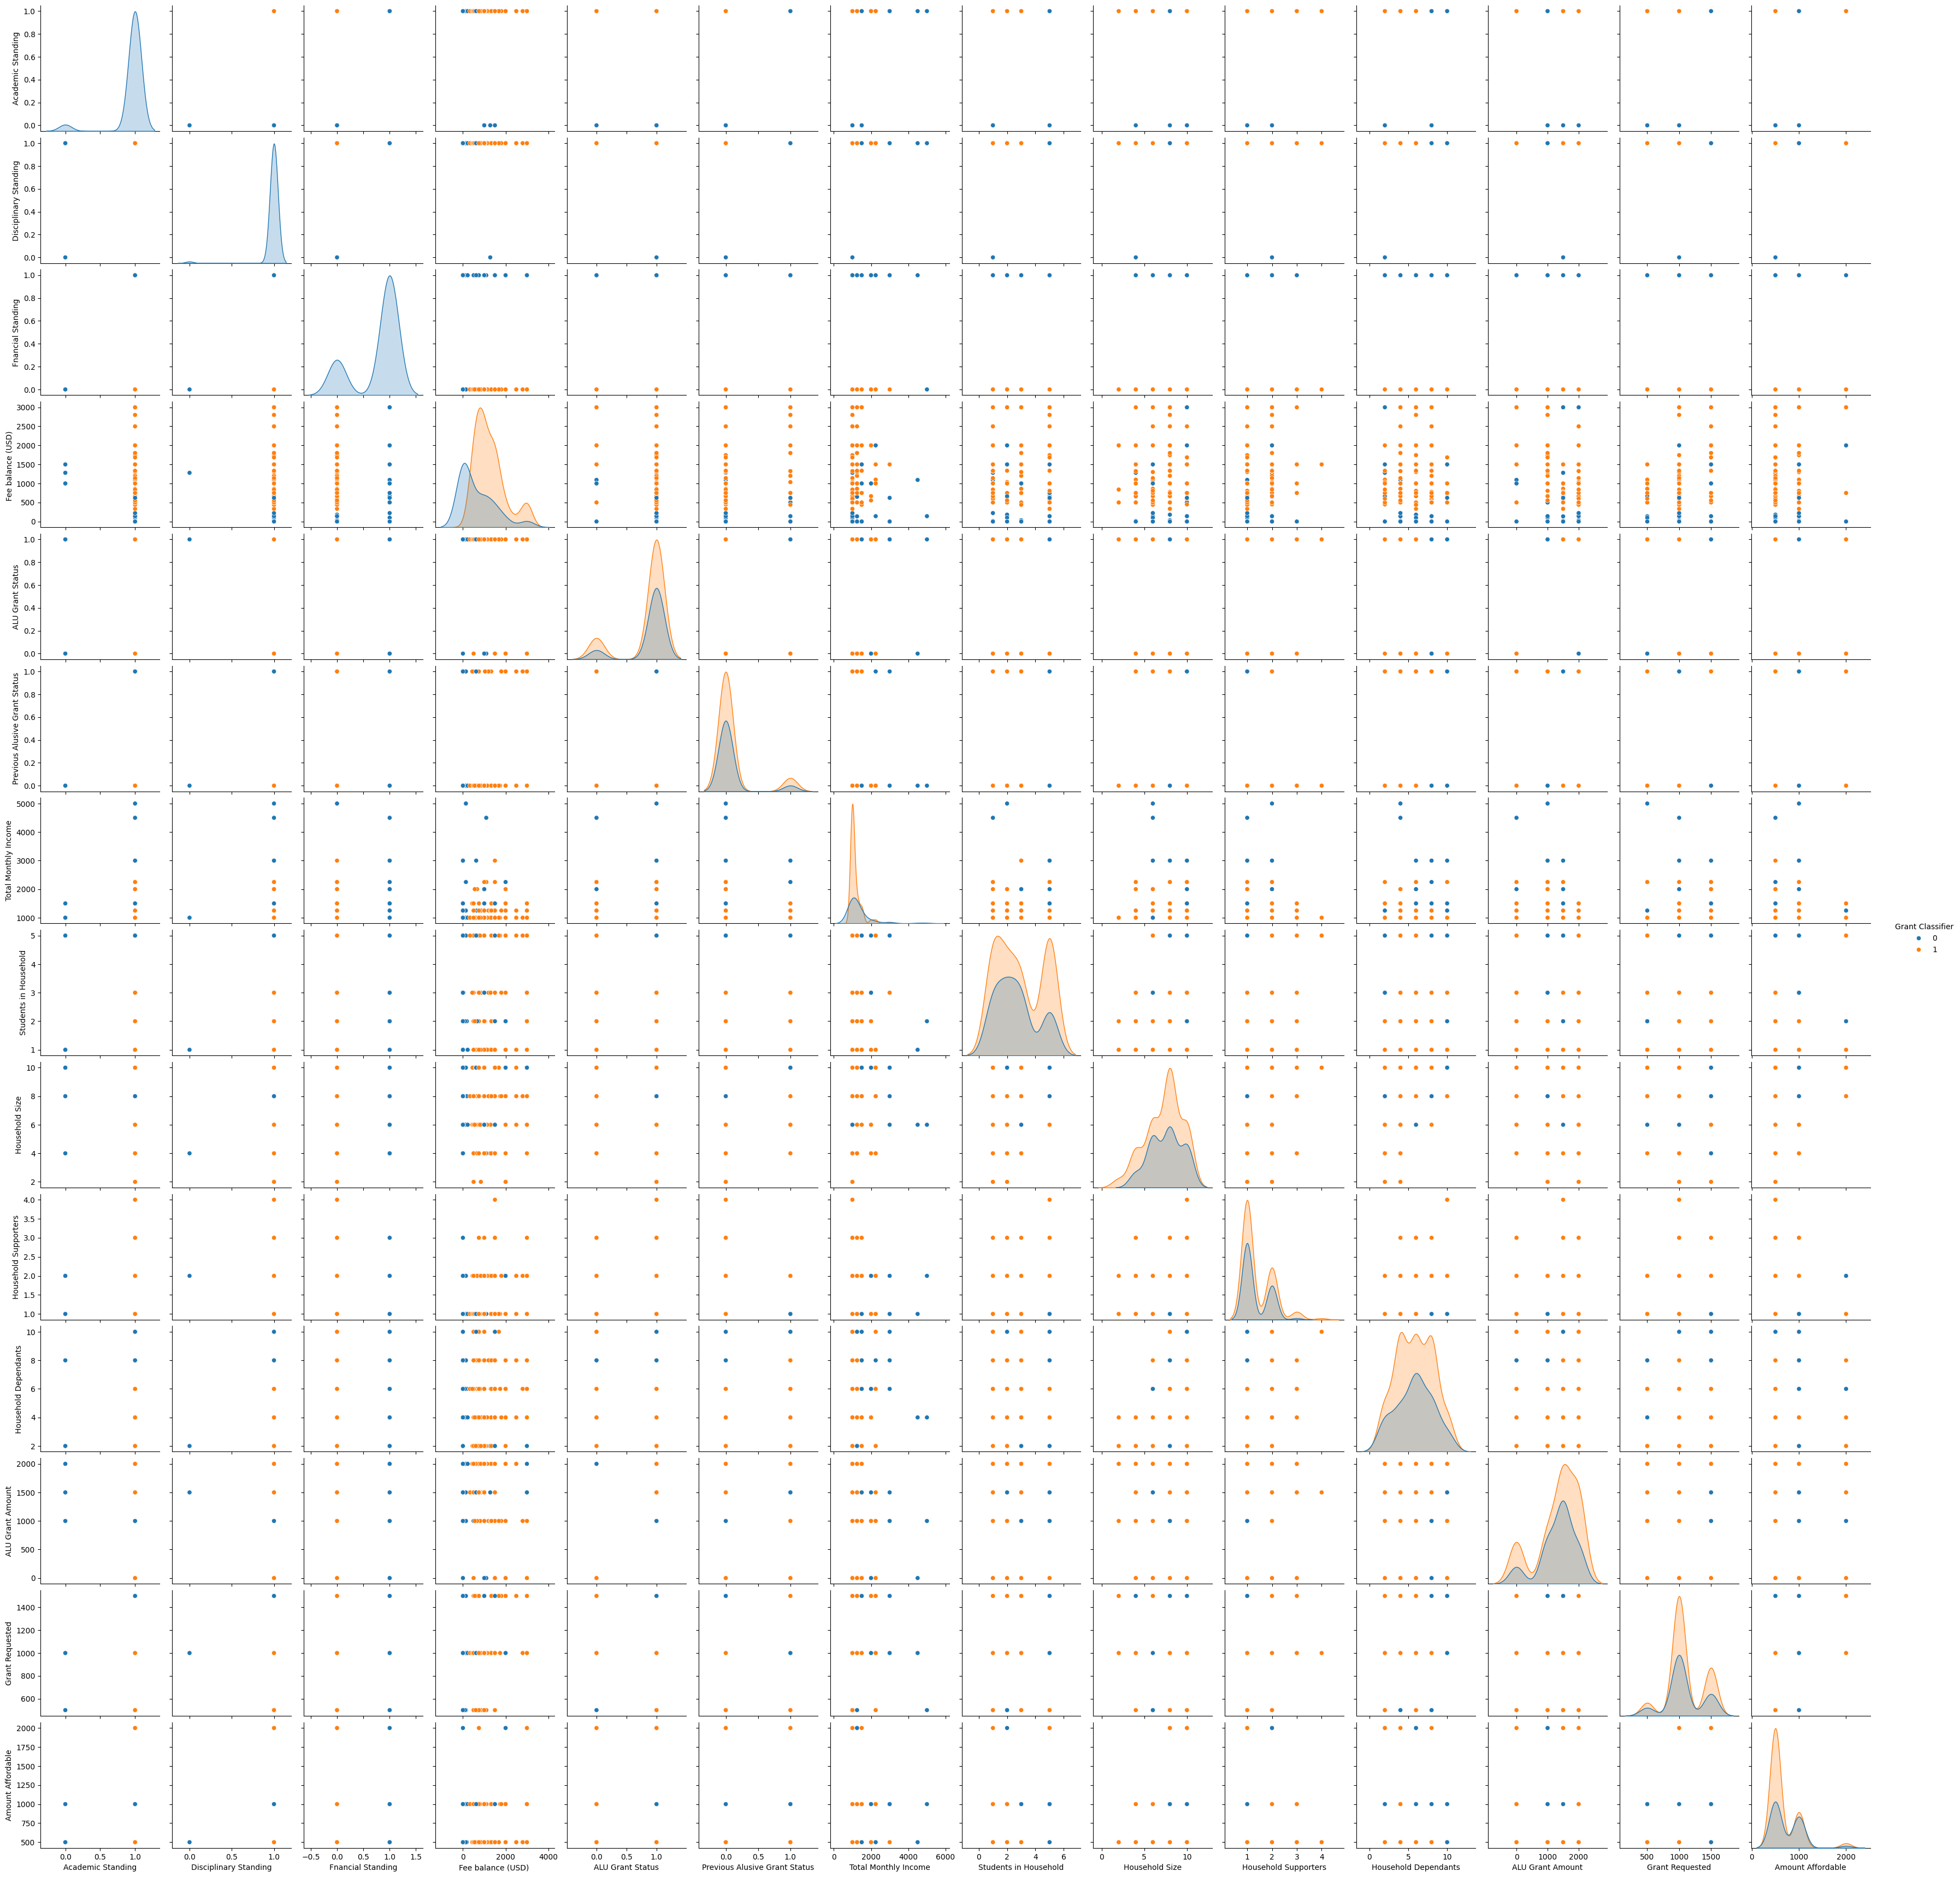

In [130]:
sns.pairplot(data.iloc[:,:], hue = "Grant Classifier");
plt.show()

##Encoded Distribution of Data

In [131]:
qualification_map = {0: 0, 1: 1}

data['Grant Classifier'] = data['Grant Classifier'].map(qualification_map)

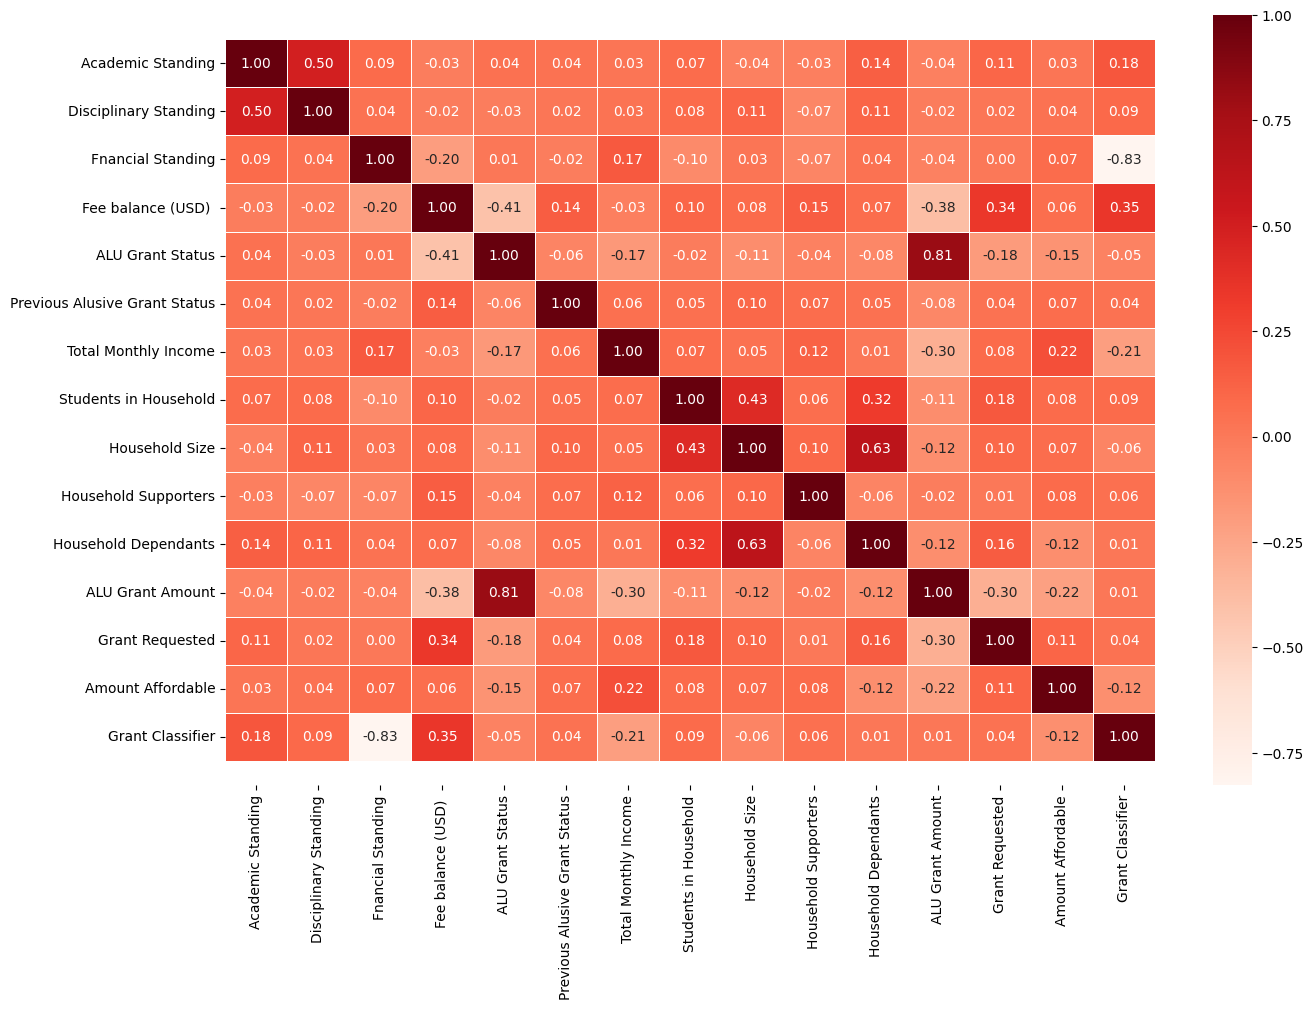

In [132]:
# Plot a correlation heatmap
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = ".2f",
                 cmap = "Reds");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

##Features and Labels of the Model

In [133]:
X = data.drop(['Grant Classifier'], axis = 1)
y = data['Grant Classifier']

In [134]:
y

0      1
1      0
2      1
3      1
4      1
      ..
213    1
214    0
215    0
216    1
217    1
Name: Grant Classifier, Length: 218, dtype: int64

##Testing, Training and Validation Data Splitting

In [135]:
# Split the data into training+validation and testing sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [136]:
# Split the training+validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)


In [137]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [138]:
X_train.shape

(139, 14)

In [139]:
X_test.shape

(44, 14)

In [140]:
X_val.shape

(35, 14)

#**Initial Model**

In [141]:
# Build the neural network with 3 hidden layers
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),  # First hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(16, activation='relu'),  # Third hidden layer
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 32)                480       
                                                                 
 dense_32 (Dense)            (None, 64)                2112      
                                                                 
 dense_33 (Dense)            (None, 32)                2080      
                                                                 
 dense_34 (Dense)            (None, 16)                528       
                                                                 
 dense_35 (Dense)            (None, 1)                 17        
                                                                 
Total params: 5217 (20.38 KB)
Trainable params: 5217 (20.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [142]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [143]:
# Train the model with validation data
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/50
5/5 [==============================] - 1s 56ms/step - loss: 0.6773 - accuracy: 0.6187 - val_loss: 0.6786 - val_accuracy: 0.6286
Epoch 2/50
5/5 [==============================] - 0s 11ms/step - loss: 0.6238 - accuracy: 0.7410 - val_loss: 0.6637 - val_accuracy: 0.6571
Epoch 3/50
5/5 [==============================] - 0s 11ms/step - loss: 0.5826 - accuracy: 0.7914 - val_loss: 0.6442 - val_accuracy: 0.6857
Epoch 4/50
5/5 [==============================] - 0s 14ms/step - loss: 0.5463 - accuracy: 0.8201 - val_loss: 0.6208 - val_accuracy: 0.7143
Epoch 5/50
5/5 [==============================] - 0s 11ms/step - loss: 0.5065 - accuracy: 0.8561 - val_loss: 0.5861 - val_accuracy: 0.7429
Epoch 6/50
5/5 [==============================] - 0s 15ms/step - loss: 0.4636 - accuracy: 0.8993 - val_loss: 0.5447 - val_accuracy: 0.7714
Epoch 7/50
5/5 [==============================] - 0s 15ms/step - loss: 0.4173 - accuracy: 0.9209 - val_loss: 0.4973 - val_accuracy: 0.8000
Epoch 8/50
5/5 [===========

In [144]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

initial_test_acc = accuracy
initial_test_loss = loss

initial_train_acc = history.history['accuracy']
initial_train_loss = history.history['loss']

initial_val_acc = history.history['val_accuracy']
initial_val_loss = history.history['val_loss']

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

2/2 [==============================] - 0s 11ms/step - loss: 0.1099 - accuracy: 0.9318
Test Loss: 0.10990891605615616
Test Accuracy: 0.9318181872367859


In [145]:
# Make predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary output

# Binarize the predicted probabilities
y_pred_initial_bin = y_pred

y_pred

2/2 [==============================] - 0s 5ms/step


array([[0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1]])

In [146]:
# Calculate metrics for the initial model
precision_initial = precision_score(y_test, y_pred_initial_bin)
recall_initial = recall_score(y_test, y_pred_initial_bin)
f1_initial = f1_score(y_test, y_pred_initial_bin)
roc_auc_initial = roc_auc_score(y_test, y_pred_initial_bin)

Confusion Matrix:
[[12  2]
 [ 1 29]]


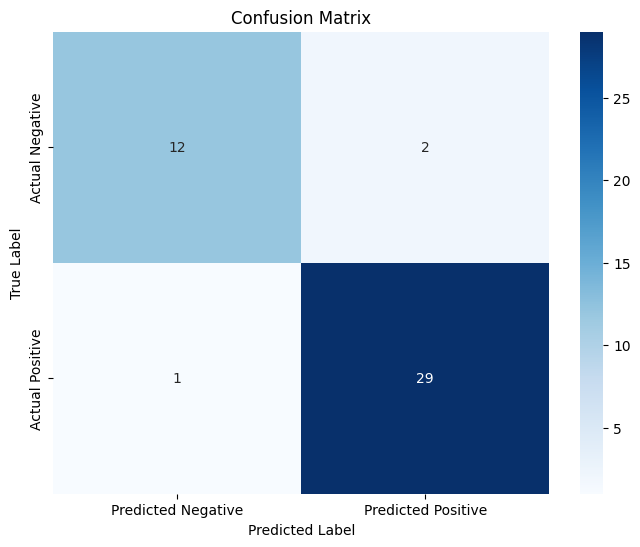

In [147]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optional: Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

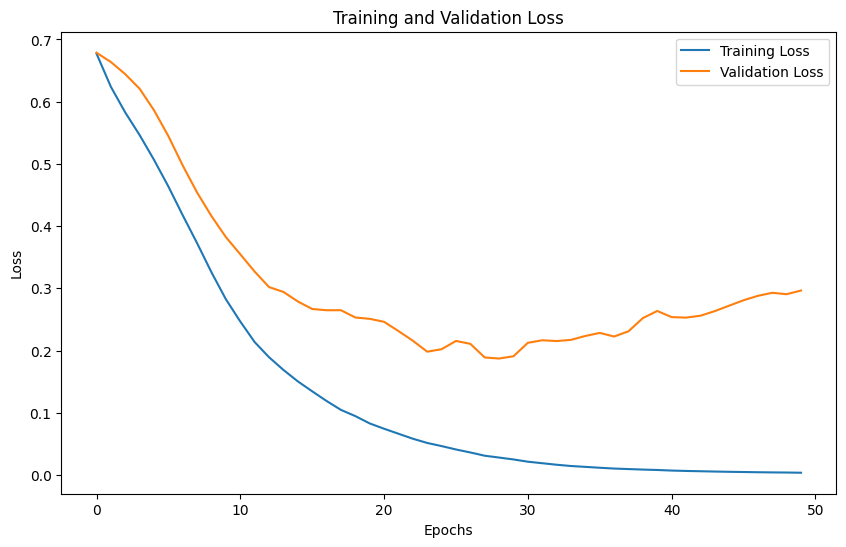

In [148]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

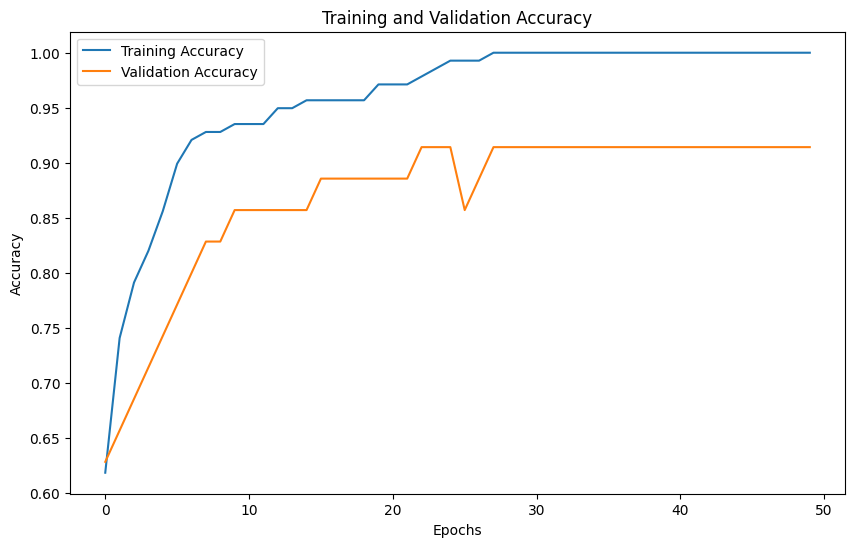

In [149]:
# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [150]:
# Create the directory if it does not exist
os.makedirs('./saved_models', exist_ok=True)

# Save the model in the pickle file in the saved_models folder
pickle.dump(model, open('./saved_models/grant_classifier.pkl', 'wb'))

# Download the model file to your local machine
from google.colab import files
files.download('./saved_models/grant_classifier.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**L2 Regularization + Dropout**

In [175]:
# Build the neural network with 3 hidden layers, L2 regularization, and dropout
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),  # First hidden layer with L2 regularization
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),  # Second hidden layer with L2 regularization
    Dropout(0.5),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),  # Third hidden layer with L2 regularization
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 32)                480       
                                                                 
 dropout_18 (Dropout)        (None, 32)                0         
                                                                 
 dense_47 (Dense)            (None, 64)                2112      
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_48 (Dense)            (None, 32)                2080      
                                                                 
 dropout_20 (Dropout)        (None, 32)                0         
                                                                 
 dense_49 (Dense)            (None, 16)               

In [152]:
# Compile the model
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [153]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [154]:
# Train the model with validation data, early stopping, and capture the history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/50
5/5 [==============================] - 3s 102ms/step - loss: 2.1237 - accuracy: 0.3957 - val_loss: 1.9066 - val_accuracy: 0.5143
Epoch 2/50
5/5 [==============================] - 0s 23ms/step - loss: 2.0140 - accuracy: 0.4029 - val_loss: 1.8763 - val_accuracy: 0.6000
Epoch 3/50
5/5 [==============================] - 0s 33ms/step - loss: 1.9333 - accuracy: 0.4460 - val_loss: 1.8488 - val_accuracy: 0.7143
Epoch 4/50
5/5 [==============================] - 0s 23ms/step - loss: 1.8770 - accuracy: 0.5036 - val_loss: 1.8252 - val_accuracy: 0.6571
Epoch 5/50
5/5 [==============================] - 0s 23ms/step - loss: 1.8585 - accuracy: 0.4964 - val_loss: 1.8041 - val_accuracy: 0.5714
Epoch 6/50
5/5 [==============================] - 0s 21ms/step - loss: 1.8170 - accuracy: 0.5324 - val_loss: 1.7834 - val_accuracy: 0.5429
Epoch 7/50
5/5 [==============================] - 0s 43ms/step - loss: 1.7821 - accuracy: 0.5540 - val_loss: 1.7619 - val_accuracy: 0.5429
Epoch 8/50
5/5 [==========

In [155]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

l2_dropout_test_acc = accuracy
l2_dropout_test_loss = loss

l2_dropout_train_acc = history.history['accuracy']
l2_dropout_train_loss = history.history['loss']

l2_dropout_val_acc = history.history['val_accuracy']
l2_dropout_val_loss = history.history['val_loss']

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

2/2 [==============================] - 0s 10ms/step - loss: 0.7344 - accuracy: 0.8864
Test Loss: 0.734389066696167
Test Accuracy: 0.8863636255264282


In [156]:
# Make predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary output

# Binarize the predicted probabilities
y_pred_second_bin = y_pred

2/2 [==============================] - 0s 33ms/step


In [157]:
# Calculate metrics for the second model
precision_second = precision_score(y_test, y_pred_second_bin)
recall_second = recall_score(y_test, y_pred_second_bin)
f1_second = f1_score(y_test, y_pred_second_bin)
roc_auc_second = roc_auc_score(y_test, y_pred_second_bin)

Confusion Matrix:
[[10  4]
 [ 1 29]]


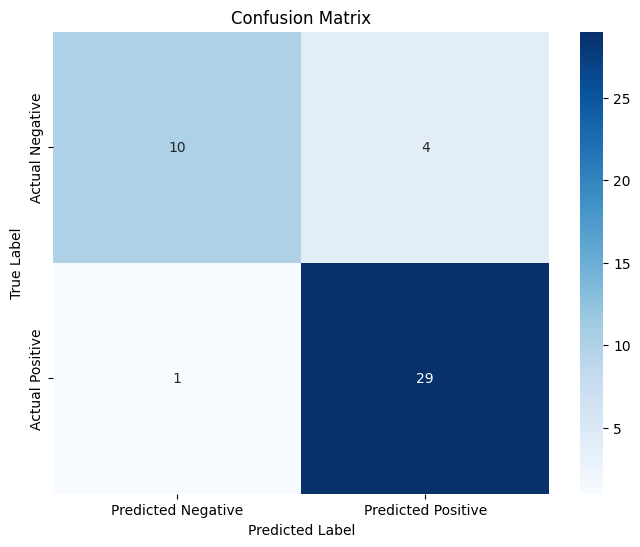

In [158]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optional: Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

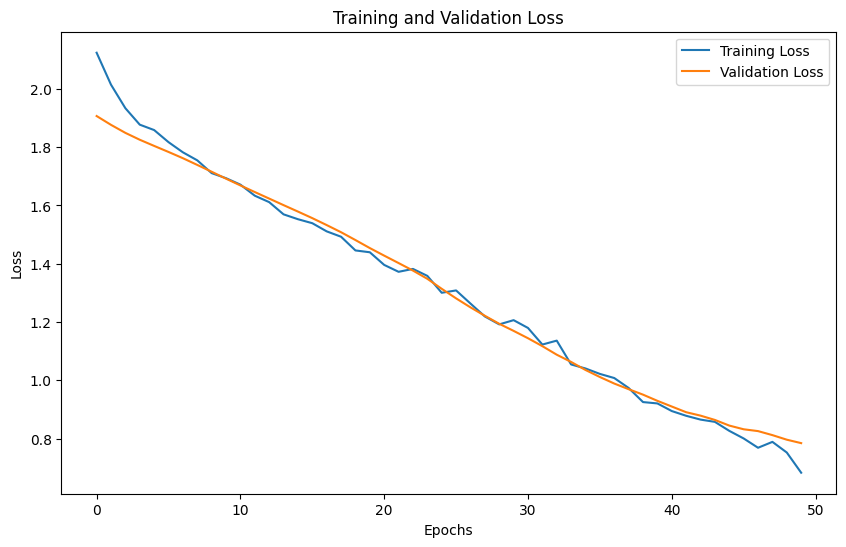

In [159]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

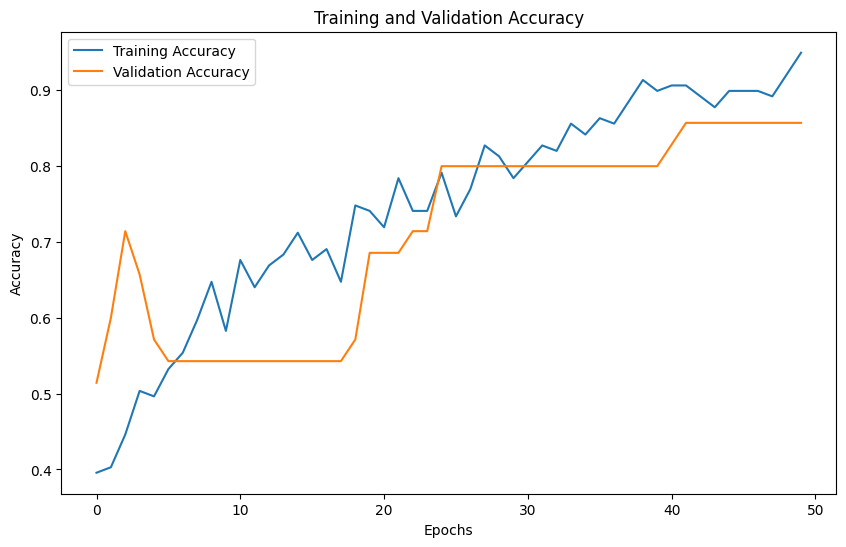

In [160]:
# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [161]:
# Create the directory if it does not exist
os.makedirs('./saved_models', exist_ok=True)

# Save the model in the pickle file in the Saved Models folder
pickle.dump(model, open('./saved_models/grant_classifier_V2.pkl', 'wb'))

# Download the model file to your local machine
from google.colab import files
files.download('./saved_models/grant_classifier_V2.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**L2 regularization, Dropout, and Batch Normalization**

In [176]:
# Build the neural network with 3 hidden layers, L2 regularization, dropout, and batch normalization
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),  # First hidden layer with L2 regularization
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),  # Second hidden layer with L2 regularization
    BatchNormalization(),
    Dropout(0.5),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),  # Third hidden layer with L2 regularization
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 32)                480       
                                                                 
 batch_normalization_9 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dropout_21 (Dropout)        (None, 32)                0         
                                                                 
 dense_52 (Dense)            (None, 64)                2112      
                                                                 
 batch_normalization_10 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_22 (Dropout)        (None, 64)              

In [163]:
# Compile the model
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [164]:
# Define early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)


In [165]:
# Train the model with validation data, early stopping, learning rate scheduler, and capture the history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr])

Epoch 1/50
5/5 [==============================] - 8s 276ms/step - loss: 2.1666 - accuracy: 0.5324 - val_loss: 1.9850 - val_accuracy: 0.4571 - lr: 0.0010
Epoch 2/50
5/5 [==============================] - 0s 64ms/step - loss: 2.2130 - accuracy: 0.5324 - val_loss: 1.9581 - val_accuracy: 0.5429 - lr: 0.0010
Epoch 3/50
5/5 [==============================] - 0s 60ms/step - loss: 2.0045 - accuracy: 0.6187 - val_loss: 1.9362 - val_accuracy: 0.5143 - lr: 0.0010
Epoch 4/50
5/5 [==============================] - 0s 51ms/step - loss: 2.0292 - accuracy: 0.5971 - val_loss: 1.9213 - val_accuracy: 0.4571 - lr: 0.0010
Epoch 5/50
5/5 [==============================] - 0s 46ms/step - loss: 1.9182 - accuracy: 0.6547 - val_loss: 1.9027 - val_accuracy: 0.5429 - lr: 0.0010
Epoch 6/50
5/5 [==============================] - 0s 24ms/step - loss: 1.9308 - accuracy: 0.6403 - val_loss: 1.8842 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 7/50
5/5 [==============================] - 0s 46ms/step - loss: 1.9778 - accurac

In [166]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

l2_dropout_bn_sched_test_acc = accuracy
l2_dropout_bn_sched_test_loss = loss

l2_dropout_bn_sched_train_acc = history.history['accuracy']
l2_dropout_bn_sched_train_loss = history.history['loss']

l2_dropout_bn_sched_val_acc = history.history['val_accuracy']
l2_dropout_bn_sched_val_loss = history.history['val_loss']

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

2/2 [==============================] - 0s 9ms/step - loss: 1.1691 - accuracy: 0.9545
Test Loss: 1.1690747737884521
Test Accuracy: 0.9545454382896423


In [167]:
# Make predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary output

# Binarize the predicted probabilities
y_pred_third_bin = y_pred

2/2 [==============================] - 0s 6ms/step


In [168]:
# Calculate metrics for the third model
precision_third = precision_score(y_test, y_pred_third_bin)
recall_third = recall_score(y_test, y_pred_third_bin)
f1_third = f1_score(y_test, y_pred_third_bin)
roc_auc_third = roc_auc_score(y_test, y_pred_third_bin)

Confusion Matrix:
[[12  2]
 [ 0 30]]


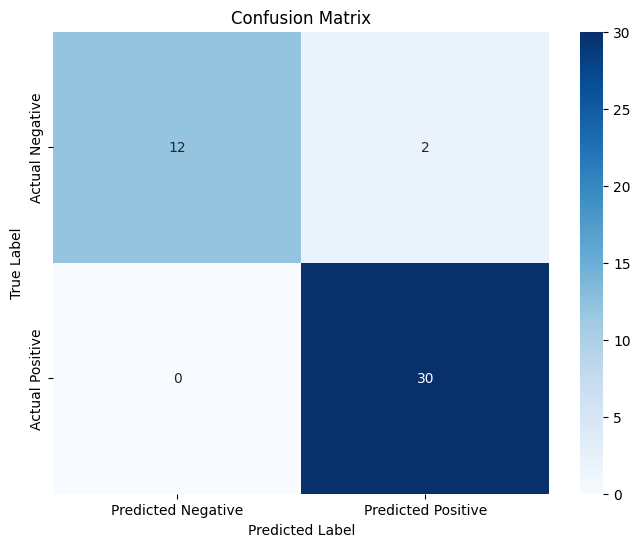

In [169]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optional: Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

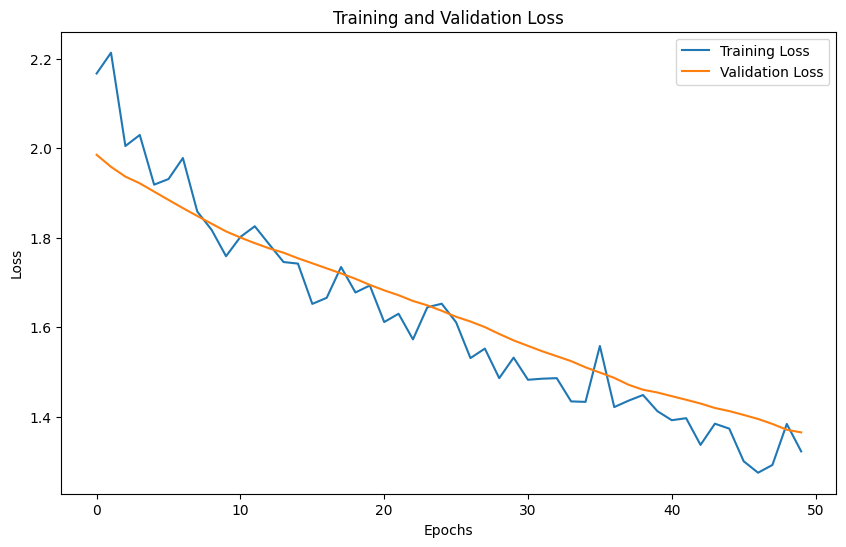

In [170]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

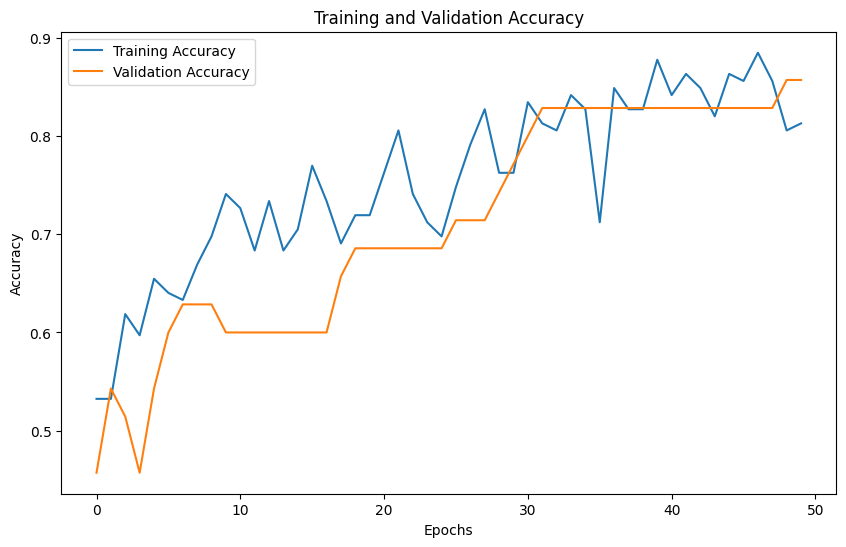

In [171]:
# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [172]:
# Create the directory if it does not exist
os.makedirs('./saved_models', exist_ok=True)

# Save the model in the pickle file in the Saved Models folder
pickle.dump(model, open('./saved_models/grant_classifier_V3.pkl', 'wb'))

# Download the model file to your local machine
from google.colab import files
files.download('./saved_models/grant_classifier_V3.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#***Result Comparison***

                                  Model  Train Accuracy  Validation Accuracy  \
0                         Initial Model        0.956978             0.870286   
1           L2 Regularization + Dropout        0.747194             0.710286   
2  L2 + Dropout + BatchNorm + Scheduler        0.755252             0.710286   

   Test Accuracy  Train Loss  Validation Loss  Test Loss  
0       0.931818    0.138976         0.309270   0.109909  
1       0.886364    1.310635         1.306592   0.734389  
2       0.954545    1.617389         1.636410   1.169075  


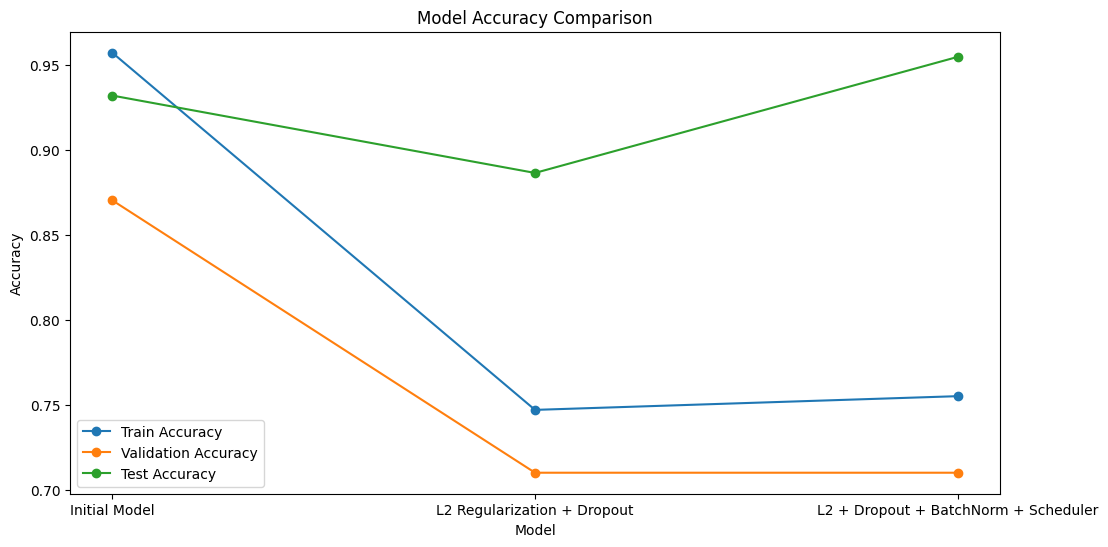

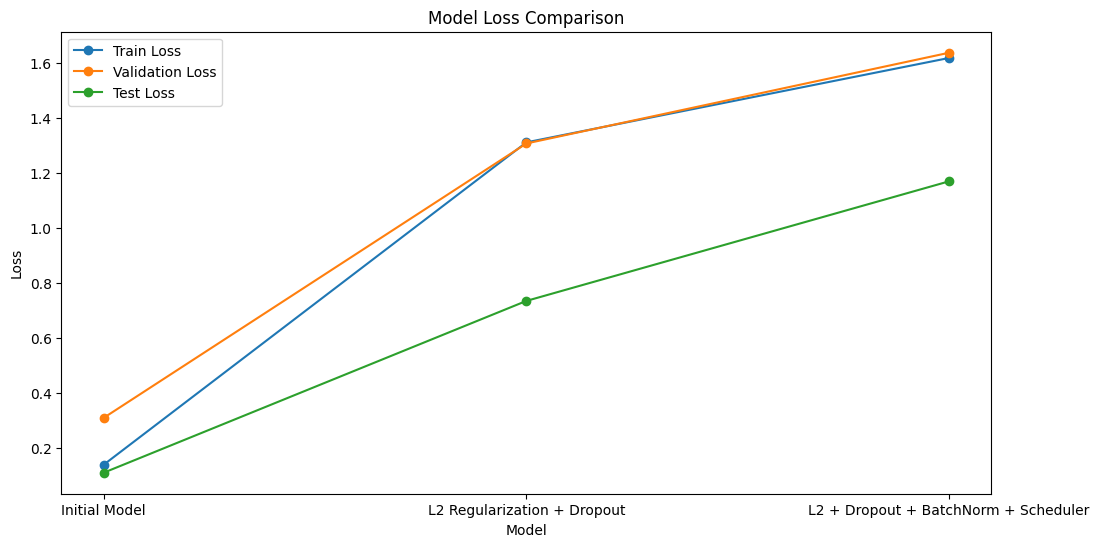

In [173]:
# Using the stored the results for each model
results = {
    'Model': ['Initial Model', 'L2 Regularization + Dropout', 'L2 + Dropout + BatchNorm + Scheduler'],
    'Train Accuracy': [sum(initial_train_acc) / len(initial_train_acc),
                       sum(l2_dropout_train_acc) / len(l2_dropout_train_acc),
                       sum(l2_dropout_bn_sched_train_acc) / len(l2_dropout_bn_sched_train_acc)],
    'Validation Accuracy': [sum(initial_val_acc) / len(initial_val_acc),
                            sum(l2_dropout_val_acc) / len(l2_dropout_val_acc),
                            sum(l2_dropout_bn_sched_val_acc) / len(l2_dropout_bn_sched_val_acc)],
    'Test Accuracy': [initial_test_acc, l2_dropout_test_acc, l2_dropout_bn_sched_test_acc],
    'Train Loss': [sum(initial_train_loss) / len(initial_train_loss),
                   sum(l2_dropout_train_loss) / len(l2_dropout_train_loss),
                   sum(l2_dropout_bn_sched_train_loss) / len(l2_dropout_bn_sched_train_loss)],
    'Validation Loss': [sum(initial_val_loss) / len(initial_val_loss),
                        sum(l2_dropout_val_loss) / len(l2_dropout_val_loss),
                        sum(l2_dropout_bn_sched_val_loss) / len(l2_dropout_bn_sched_val_loss)],
    'Test Loss': [initial_test_loss, l2_dropout_test_loss, l2_dropout_bn_sched_test_loss]
}

# Convert to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Plot accuracy comparison
plt.figure(figsize=(12, 6))
plt.plot(results_df['Model'], results_df['Train Accuracy'], marker='o', label='Train Accuracy')
plt.plot(results_df['Model'], results_df['Validation Accuracy'], marker='o', label='Validation Accuracy')
plt.plot(results_df['Model'], results_df['Test Accuracy'], marker='o', label='Test Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.legend()
plt.show()

# Plot loss comparison
plt.figure(figsize=(12, 6))
plt.plot(results_df['Model'], results_df['Train Loss'], marker='o', label='Train Loss')
plt.plot(results_df['Model'], results_df['Validation Loss'], marker='o', label='Validation Loss')
plt.plot(results_df['Model'], results_df['Test Loss'], marker='o', label='Test Loss')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.title('Model Loss Comparison')
plt.legend()
plt.show()

##***Metric Comparison***

                                  Model  Precision    Recall  F1 Score  \
0                         Initial Model   0.935484  0.966667  0.950820   
1           L2 Regularization + Dropout   0.878788  0.966667  0.920635   
2  L2 + Dropout + BatchNorm + Scheduler   0.937500  1.000000  0.967742   

   ROC-AUC Score  
0       0.911905  
1       0.840476  
2       0.928571  


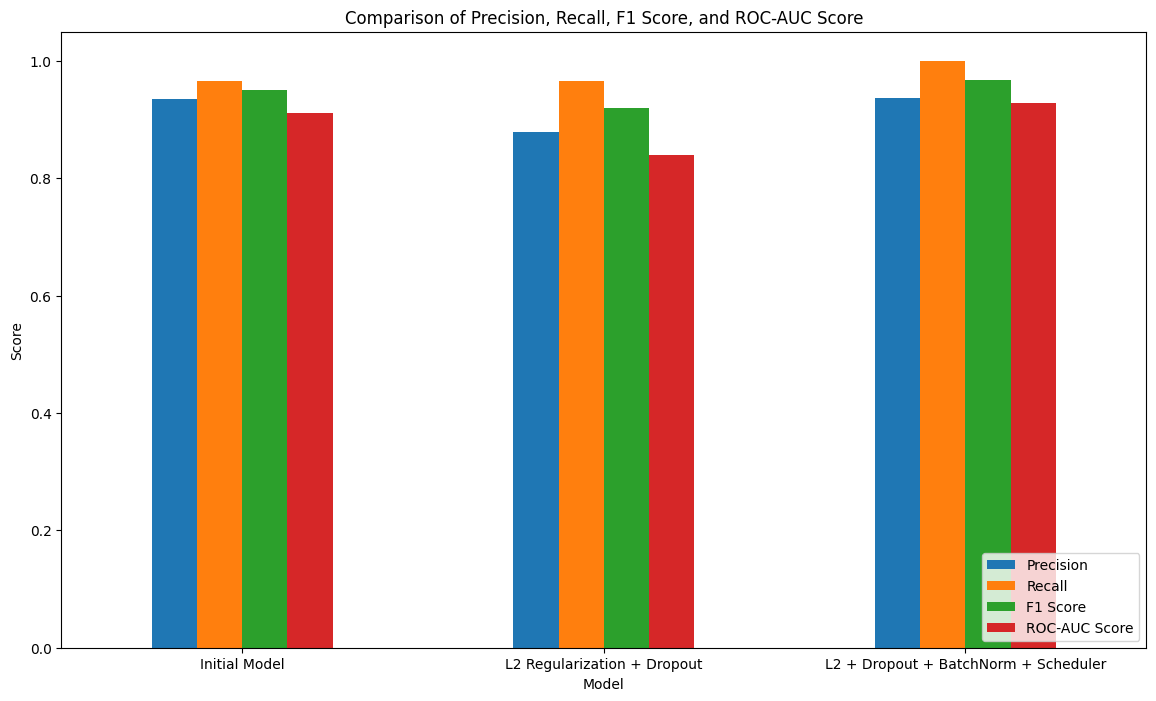

In [177]:
# Dictionary to store the results
metrics = {
    'Model': ['Initial Model', 'L2 Regularization + Dropout', 'L2 + Dropout + BatchNorm + Scheduler'],
    'Precision': [precision_initial, precision_second, precision_third],
    'Recall': [recall_initial, recall_second, recall_third],
    'F1 Score': [f1_initial, f1_second, f1_third],
    'ROC-AUC Score': [roc_auc_initial, roc_auc_second, roc_auc_third]
}

# Convert to DataFrame for better visualization
metrics_df = pd.DataFrame(metrics)

# Print the results
print(metrics_df)

# Plot the precision, recall, F1 score, and ROC-AUC score
metrics_df.set_index('Model', inplace=True)
metrics_df.plot(kind='bar', figsize=(14, 8))
plt.title('Comparison of Precision, Recall, F1 Score, and ROC-AUC Score')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

##***Comparative Analysis***

	1.	Precision:
	  •	The “L2 + Dropout + BatchNorm + Scheduler” model has the highest precision (0.937500),
    slightly better than the initial model (0.935484).
	2.	Recall:
	  •	The “L2 + Dropout + BatchNorm + Scheduler” model achieves perfect recall (1.000000),
    which is better than both the initial model (0.966667) and the “L2 Regularization + Dropout” model (0.966667).
	3.	F1 Score:
	  •	The “L2 + Dropout + BatchNorm + Scheduler” model has the highest F1 score (0.967742),
    indicating the best balance between precision and recall.
	4.	ROC-AUC Score:
	  •	The “L2 + Dropout + BatchNorm + Scheduler” model also has the highest ROC-AUC score (0.928571),
    indicating the best overall performance in distinguishing between classes.

#**Conclusion**

While the **"Initial Model"** is very strong, it is slightly outperformed by the “L2 + Dropout + BatchNorm + Scheduler” model across all metrics. The latter model achieves slightly higher precision, perfect recall, a higher F1 score, and a higher ROC-AUC score. Thus, while the initial model is excellent, the “L2 + Dropout + BatchNorm + Scheduler” model is slightly better overall.

The **“L2 Regularization + Dropout”** model performs well in terms of recall, but it is outperformed by the other models in terms of precision, F1 score, and ROC-AUC score

Based on the provided scores, the **“L2 + Dropout + BatchNorm + Scheduler”** model is the best overall. It has the highest precision, recall, F1 score, and ROC-AUC score. This model not only captures all actual positive cases but also maintains high precision, resulting in fewer false positives. Additionally, its superior ROC-AUC score indicates robust performance in distinguishing between the positive and negative classes.
